In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


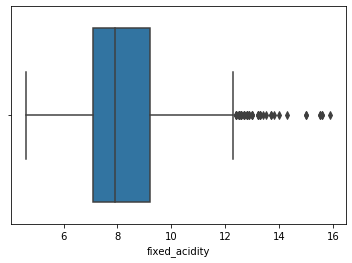

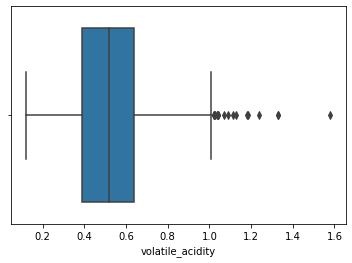

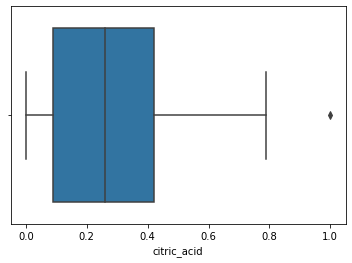

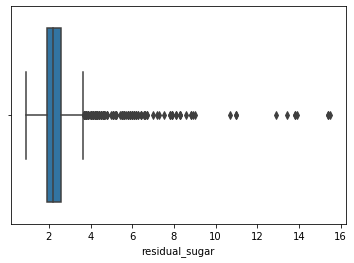

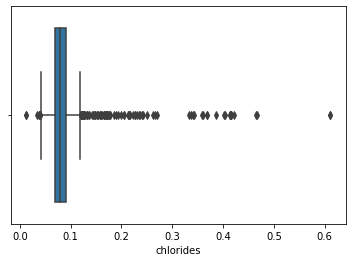

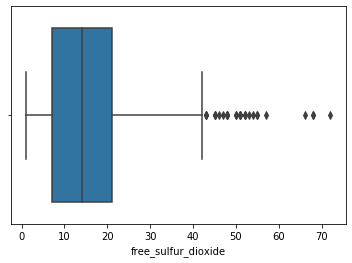

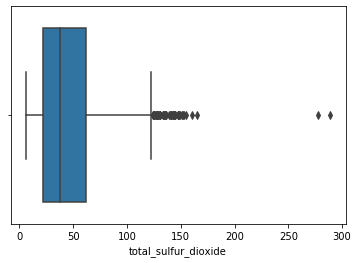

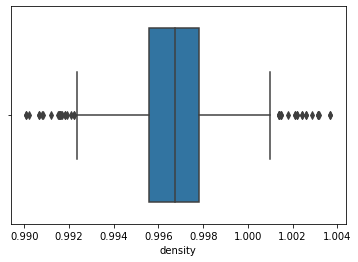

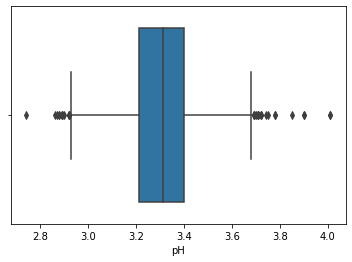

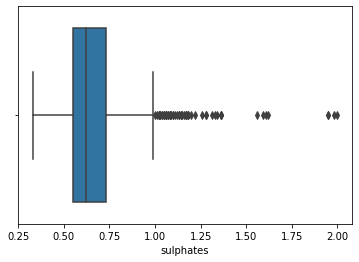

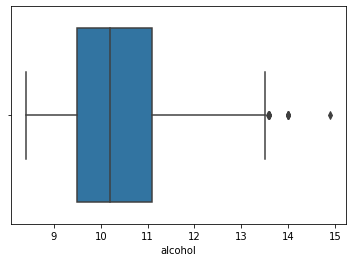

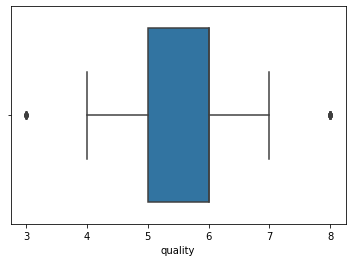

In [6]:
for j in df.columns:
    sns.boxplot(df[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [7]:
df3 = pd.DataFrame()
for i in df.columns:
    if df[i].dtype!='O':
        lis =[]
        q1  = df[i].quantile(0.25)
        #print(q1)
        q3 =df[i].quantile(0.75)
        IQR = q3-q1
        ll= q1-1.5*IQR
        ul = q3+1.5*IQR
        #print(ul)
        #lis = df[i][df[i]<ll]
        
        #for j in lis.values:
        #    if j <ll:
                
            
        #print(lis.values)
        df3[i] = df[i][(df[i]>ll)&(df[i]<ul)]

In [8]:
df3.isna().sum()

fixed_acidity             0
volatile_acidity         19
citric_acid               1
residual_sugar          140
chlorides               111
free_sulfur_dioxide      33
total_sulfur_dioxide     58
density                  31
pH                       30
sulphates                57
alcohol                  13
quality                  27
dtype: int64

In [9]:
from sklearn.impute import KNNImputer


In [10]:
imputer = KNNImputer(n_neighbors=5)
impu =imputer.fit_transform(df3)

In [11]:
df4 = pd.DataFrame(impu,columns=df.columns)

In [12]:
#df4 =df.copy()

In [13]:
df4.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

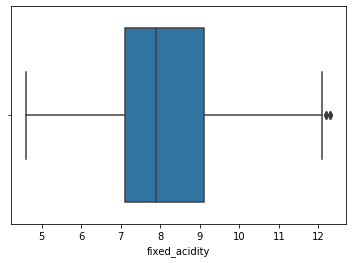

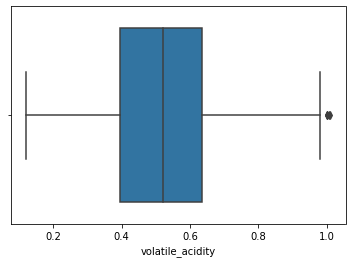

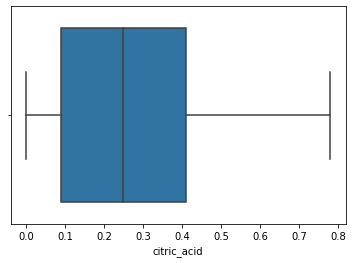

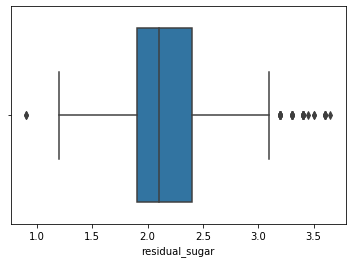

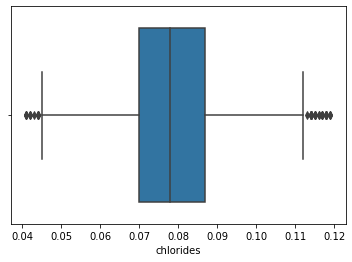

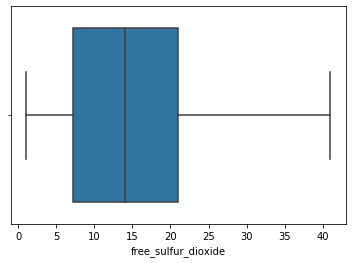

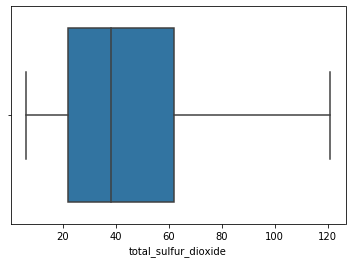

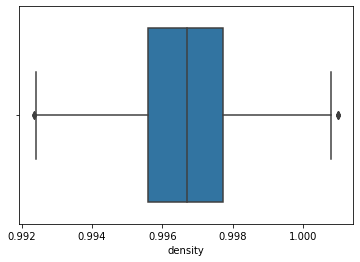

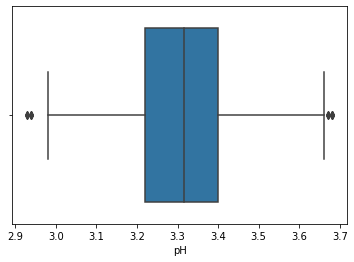

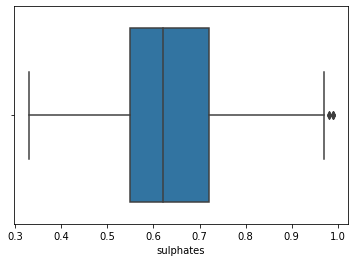

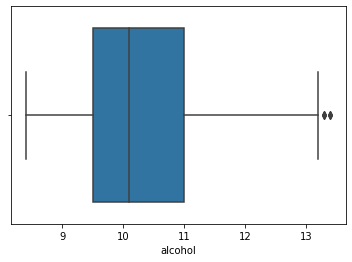

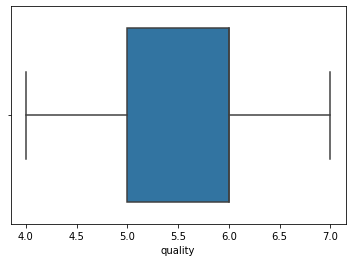

In [14]:
for j in df4.columns:
    sns.boxplot(df4[j])
    #df[j].plot(kind ='boxplot')
    plt.show()

In [15]:
#sns.pairplot(df4,diag_kind ='hist',hue = 'quality')

In [16]:
df5 =df4.drop(columns ='quality' )

In [17]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [18]:
df_scaled = df5.apply(zscore)

In [19]:
model = KMeans(n_clusters = 3)

In [20]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,17050.000000
1,2,13935.497588
2,3,12168.520985
3,4,10967.465484
4,5,10233.298980
5,6,9743.575096
6,7,9363.577650
7,8,9063.680245
8,9,8736.002601
9,10,8493.848211


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

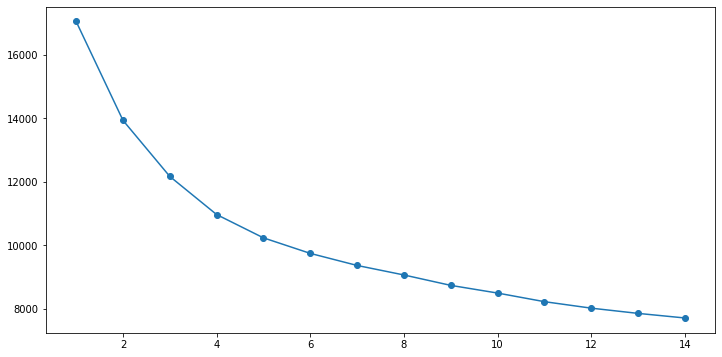

In [22]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [37]:
kmeans = KMeans(n_clusters=9, n_init = 15, random_state=2345)

In [38]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [39]:
centroids = kmeans.cluster_centers_

In [40]:
centroids

array([[ 0.09442504, -1.07445715,  0.80132414, -0.03639181, -0.6288062 ,
        -0.43473813, -0.67132021, -1.04649002, -0.19754555,  0.39448878,
         1.38101107],
       [-1.11741268,  0.73307227, -0.99640001, -0.16332028, -0.94366486,
        -0.10948214, -0.36626235, -1.38247642,  1.17147969, -0.27140778,
         1.31448536],
       [-0.13409271,  0.82563006, -0.66875629,  0.68179819,  0.62069226,
        -0.54774796, -0.46048874,  0.44956404,  0.21511168, -0.49433956,
        -0.36051819],
       [ 1.61426186, -0.65143998,  1.42518813,  0.88968025,  0.64159835,
        -0.7660971 , -0.67284495,  1.17267558, -0.85733562,  0.35697454,
         0.36500807],
       [ 0.78175872, -0.05366493,  0.53461478,  1.09671786,  0.61773769,
         0.92108185,  1.14032064,  1.09782115, -0.44231223,  0.18882375,
        -0.54934695],
       [-0.6586815 , -0.54935935, -0.08464671, -0.28395051, -0.45514629,
         1.37328972,  0.68588645, -0.2984753 ,  0.61705403,  0.4484839 ,
         0.172

In [41]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [42]:
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.094425,-1.074457,0.801324,-0.036392,-0.628806,-0.434738,-0.671320,-1.046490,-0.197546,0.394489,1.381011
1,-1.117413,0.733072,-0.996400,-0.163320,-0.943665,-0.109482,-0.366262,-1.382476,1.171480,-0.271408,1.314485
2,-0.134093,0.825630,-0.668756,0.681798,0.620692,-0.547748,-0.460489,0.449564,0.215112,-0.494340,-0.360518
3,1.614262,-0.651440,1.425188,0.889680,0.641598,-0.766097,-0.672845,1.172676,-0.857336,0.356975,0.365008
4,0.781759,-0.053665,0.534615,1.096718,0.617738,0.921082,1.140321,1.097821,-0.442312,0.188824,-0.549347
5,-0.658681,-0.549359,-0.084647,-0.283951,-0.455146,1.373290,0.685886,-0.298475,0.617054,0.448484,0.172870
6,1.031939,-0.691336,0.897429,-0.720083,-0.052131,-0.532050,-0.486923,0.414034,-1.079979,0.751113,-0.362699
7,-0.592280,0.397449,-0.821343,-0.792016,-0.171556,-0.506262,-0.570140,-0.236955,0.438225,-0.372869,-0.588563
8,-0.324438,0.664406,-0.286262,-0.169715,0.408932,0.661727,1.511352,0.036257,-0.299207,-0.629785,-0.794548


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [43]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [44]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
snail_df_labeled = df5.join(df_labels)

In [45]:
snail_df_labeled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,7


In [46]:
df_analysis = (snail_df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1545,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5
1547,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,5
1548,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [47]:
snail_df_labeled['labels'].value_counts()   #0-Infant, 1-Female, 2-Male

7    256
2    191
5    182
8    173
0    165
4    154
6    150
1    142
3    137
Name: labels, dtype: int64

In [48]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

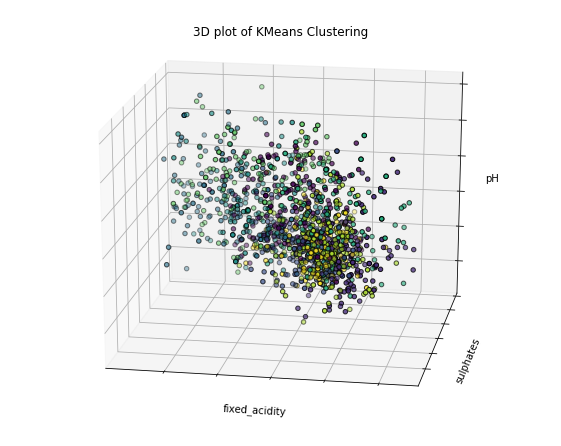

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 8], df_scaled.iloc[:, 9],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('fixed_acidity')
ax.set_ylabel('sulphates')
ax.set_zlabel('pH')
ax.set_title('3D plot of KMeans Clustering')


In [36]:
#sns.pairplot(snail_df_labeled,diag_kind ='hist',hue = 'labels')